In [1]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

# Context
The data we will be using through the pratical classes comes from a small relational database whose schema can be seen below:
![alt text](../figures/schema.png "Relation database schema")

# Reading the Data

In [2]:
# path to database
my_path = os.path.join("..", "data", "datamining.db")

# connect to the database
conn = sqlite3.connect(my_path)

# the query
query = """
select
    age, 
    income, 
    frq, 
    rcn, 
    mnt, 
    clothes, 
    kitchen, 
    small_appliances, 
    toys, 
    house_keeping,
    dependents, 
    per_net_purchase,
    g.gender, 
    e.education, 
    m.status, 
    r.description
from customers as c
    join genders as g on g.id = c.gender_id
    join education_levels as e on e.id = c.education_id
    join marital_status as m on m.id = c.marital_status_id
    join recommendations as r on r.id = c.recommendation_id
order by c.id;
"""

df = pd.read_sql_query(query, conn)

# Metadata
- *id* - The unique identifier of the customer
- *age* - The year of birht of the customer
- *income* - The income of the customer
- *frq* - Frequency: number of purchases made by the customer
- *rcn* - Recency: number of days since last customer purchase
- *mnt* - Monetary: amount of € spent by the customer in purchases
- *clothes* - Number of clothes items purchased by the customer
- *kitchen* - Number of kitchen items purchased by the customer
- *small_appliances* - Number of small_appliances items purchased by the customer
- *toys* - Number of toys items purchased by the customer
- *house_keeping* - Number of house_keeping items purchased by the customer
- *dependents* - Binary. Whether or not the customer has dependents
- *per_net_purchase* - Percentage of purchases made online
- *education* - Education level of the customer
- *status* - Marital status of the customer
- *gender* - Gender of the customer
- *description* - Last customer's recommendation description

# Initial Analysis

Pandas user guide: https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

Pandas 10 min tutorial: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

## What are some characteristics of our data?

We can use the `.shape` method to see how much data we have.

It returns a tuple with (nrows, ncols).

In [3]:
df.shape

(8998, 16)

In [4]:
# How to get the names of the columns of the data?

df.columns

Index(['age', 'income', 'frq', 'rcn', 'mnt', 'clothes', 'kitchen',
       'small_appliances', 'toys', 'house_keeping', 'dependents',
       'per_net_purchase', 'gender', 'education', 'status', 'description'],
      dtype='object')

We can use the `.info()` method to get some information about the dataset we have.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               8998 non-null   int64 
 1   income            8998 non-null   object
 2   frq               8998 non-null   int64 
 3   rcn               8998 non-null   int64 
 4   mnt               8998 non-null   int64 
 5   clothes           8998 non-null   int64 
 6   kitchen           8998 non-null   int64 
 7   small_appliances  8998 non-null   int64 
 8   toys              8998 non-null   int64 
 9   house_keeping     8998 non-null   int64 
 10  dependents        8998 non-null   object
 11  per_net_purchase  8998 non-null   int64 
 12  gender            8998 non-null   object
 13  education         8998 non-null   object
 14  status            8998 non-null   object
 15  description       8998 non-null   object
dtypes: int64(10), object(6)
memory usage: 1.1+ MB


What do these mean?

- Non-Null Count
- Dtype
    - object
    - float64
    - bool


Let's look at datatypes more closely.

Do their values look correct?

*Hint* compare the dtypes with the provided metadata.

In [6]:
df.dtypes

age                  int64
income              object
frq                  int64
rcn                  int64
mnt                  int64
clothes              int64
kitchen              int64
small_appliances     int64
toys                 int64
house_keeping        int64
dependents          object
per_net_purchase     int64
gender              object
education           object
status              object
description         object
dtype: object

We can use the `.describe()` method to calculate the basic descriptive statistics of our data.

In [7]:
df.describe()

,age,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase
count,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000
mean,1966.059680,19.848077,62.469771,622.162814,50.446655,7.039675,28.524116,7.036897,6.929984,42.428984
std,17.296552,10.903435,69.761802,646.768205,23.422249,7.848139,12.586437,7.924422,7.882655,18.495742
min,1936.000000,3.000000,0.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000
25%,1951.000000,10.000000,26.000000,63.000000,33.000000,2.000000,19.000000,2.000000,2.000000,28.000000
50%,1966.000000,17.000000,53.000000,383.000000,51.000000,4.000000,28.000000,4.000000,4.000000,45.000000
75%,1981.000000,28.000000,79.000000,1076.000000,69.000000,10.000000,37.000000,10.000000,9.000000,57.000000
max,1996.000000,59.000000,549.000000,3052.000000,99.000000,75.000000,74.000000,62.000000,77.000000,88.000000


In [9]:
## Modify the .describe() method
df.describe(include="object")

,income,dependents,gender,education,status,description
count,8998,8998,8998,8998,8998,8998
unique,8525,3,2,7,7,5
top,,1,M,Graduation,Married,OK nice!
freq,46,6164,5784,4429,3273,3434


By default `.describe()` only considers numeric features.

In [10]:
## Modify the .describe() method
df.describe(include="all")

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
count,8998.000000,8998,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.0,8998.000000,8998,8998,8998,8998
unique,NaN,8525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2,7,7,5
top,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,M,Graduation,Married,OK nice!
freq,NaN,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6164.0,NaN,5784,4429,3273,3434
mean,1966.059680,NaN,19.848077,62.469771,622.162814,50.446655,7.039675,28.524116,7.036897,6.929984,NaN,42.428984,NaN,NaN,NaN,NaN
std,17.296552,NaN,10.903435,69.761802,646.768205,23.422249,7.848139,12.586437,7.924422,7.882655,NaN,18.495742,NaN,NaN,NaN,NaN
min,1936.000000,NaN,3.000000,0.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,4.000000,NaN,NaN,NaN,NaN
25%,1951.000000,NaN,10.000000,26.000000,63.000000,33.000000,2.000000,19.000000,2.000000,2.000000,NaN,28.000000,NaN,NaN,NaN,NaN
50%,1966.000000,NaN,17.000000,53.000000,383.000000,51.000000,4.000000,28.000000,4.000000,4.000000,NaN,45.000000,NaN,NaN,NaN,NaN
75%,1981.000000,NaN,28.000000,79.000000,1076.000000,69.000000,10.000000,37.000000,10.000000,9.000000,NaN,57.000000,NaN,NaN,NaN,NaN


In [9]:
# dataset head
df.head(10)

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
0,1946,90782,33,66,1402,37,5,44,10,3,0,19,M,Graduation,Together,Take my money!!
1,1936,113023,32,6,1537,55,1,38,4,2,0,9,F,PhD,Divorced,Take my money!!
2,1990,28344,11,69,44,32,19,24,1,24,1,59,M,Graduation,Married,Kind of OK
3,1955,93571,26,10,888,60,10,19,6,5,1,35,F,Master,,OK nice!
4,1955,91852,31,26,1138,59,5,28,4,4,1,34,F,Graduation,Together,Take my money!!
5,1982,22386,14,65,56,47,2,48,2,1,1,67,M,PhD,Single,OK nice!
6,1969,69485,18,73,345,71,7,13,1,8,1,46,M,Graduation,Together,OK nice!
7,1960,68602,5,44,41,84,1,12,2,0,1,37,M,Graduation,Together,Horrible
8,1940,109499,30,75,1401,38,9,35,9,9,0,17,M,Graduation,Divorced,OK nice!
9,1994,23846,8,153,19,18,55,17,10,1,1,39,F,1st Cycle,Together,Meh...


In [12]:
# descriptive statistics
df.describe(include="all").T  # Transpose df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,8998.0,NaN,NaN,NaN,1966.05968,17.296552,1936.0,1951.0,1966.0,1981.0,1996.0
income,8998,8525,,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frq,8998.0,NaN,NaN,NaN,19.848077,10.903435,3.0,10.0,17.0,28.0,59.0
rcn,8998.0,NaN,NaN,NaN,62.469771,69.761802,0.0,26.0,53.0,79.0,549.0
mnt,8998.0,NaN,NaN,NaN,622.162814,646.768205,6.0,63.0,383.0,1076.0,3052.0
clothes,8998.0,NaN,NaN,NaN,50.446655,23.422249,1.0,33.0,51.0,69.0,99.0
kitchen,8998.0,NaN,NaN,NaN,7.039675,7.848139,0.0,2.0,4.0,10.0,75.0
small_appliances,8998.0,NaN,NaN,NaN,28.524116,12.586437,1.0,19.0,28.0,37.0,74.0
toys,8998.0,NaN,NaN,NaN,7.036897,7.924422,0.0,2.0,4.0,10.0,62.0
house_keeping,8998.0,NaN,NaN,NaN,6.929984,7.882655,0.0,2.0,4.0,9.0,77.0


In [13]:
# Use these cells to further explore the dataset
# CODE HERE

In [14]:
df.head()

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
0,1946,90782,33,66,1402,37,5,44,10,3,0,19,M,Graduation,Together,Take my money!!
1,1936,113023,32,6,1537,55,1,38,4,2,0,9,F,PhD,Divorced,Take my money!!
2,1990,28344,11,69,44,32,19,24,1,24,1,59,M,Graduation,Married,Kind of OK
3,1955,93571,26,10,888,60,10,19,6,5,1,35,F,Master,,OK nice!
4,1955,91852,31,26,1138,59,5,28,4,4,1,34,F,Graduation,Together,Take my money!!


In [15]:
df.tail()

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
8993,1960,94367,28,1,896,68,5,21,3,4,1,55,F,1st Cycle,Single,Take my money!!
8994,1975,58121,12,6,61,53,6,28,7,6,1,71,M,2nd Cycle,Single,Meh...
8995,1986,54292,29,72,1011,41,11,36,1,11,0,31,M,Graduation,Together,Take my money!!
8996,1938,125962,38,75,1668,61,2,25,5,6,1,45,M,2nd Cycle,Married,Take my money!!
8997,1994,26385,9,24,46,5,13,21,46,15,1,52,M,1st Cycle,Single,Kind of OK


## Let's do some operations on our data

### Taking a subset of data

You can take a subset with fewer columns by giving a **list** of features:

In [16]:
## Notice that we use two sets of square brackets

df[['age', 'education']]

,age,education
0,1946,Graduation
1,1936,PhD
2,1990,Graduation
3,1955,Master
4,1955,Graduation
...,...,...
8993,1960,1st Cycle
8994,1975,2nd Cycle
8995,1986,Graduation
8996,1938,2nd Cycle


You can select a single column of data by providing the name of a single column. This returns a "Series", instead of a DataFrame.

In [17]:
# How to get the values of one column of data?
# Different ways to access the values of a column

df['age']
df.age
df.loc[:,'age']


0       1946
1       1936
2       1990
3       1955
4       1955
        ... 
8993    1960
8994    1975
8995    1986
8996    1938
8997    1994
Name: age, Length: 8998, dtype: int64

In [18]:

df['age']

0       1946
1       1936
2       1990
3       1955
4       1955
        ... 
8993    1960
8994    1975
8995    1986
8996    1938
8997    1994
Name: age, Length: 8998, dtype: int64

In [19]:
## Notice the difference

df[['age']]

,age
0,1946
1,1936
2,1990
3,1955
4,1955
...,...
8993,1960
8994,1975
8995,1986
8996,1938


In [20]:
# How to get the unique values of one column of data?

df['education'].unique()


array(['Graduation', 'PhD', 'Master', '1st Cycle', '2nd Cycle',
       'OldSchool', ''], dtype=object)

#### What about a subset of rows?

In [21]:
df.loc[[0,1,2,3,4]]

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
0,1946,90782,33,66,1402,37,5,44,10,3,0,19,M,Graduation,Together,Take my money!!
1,1936,113023,32,6,1537,55,1,38,4,2,0,9,F,PhD,Divorced,Take my money!!
2,1990,28344,11,69,44,32,19,24,1,24,1,59,M,Graduation,Married,Kind of OK
3,1955,93571,26,10,888,60,10,19,6,5,1,35,F,Master,,OK nice!
4,1955,91852,31,26,1138,59,5,28,4,4,1,34,F,Graduation,Together,Take my money!!


In [22]:
df.loc[[10,11,12,13,14]]


,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
10,1949,97492,20,93,774,37,16,33,9,5,0,15,M,Master,Single,OK nice!
11,1957,75436,17,32,491,60,4,33,2,1,1,29,M,Graduation,Together,OK nice!
12,1954,95586,32,54,1407,27,3,39,20,11,0,23,F,2nd Cycle,Widow,Take my money!!
13,1979,57997,10,28,81,77,0,21,1,0,1,52,M,Graduation,Married,Meh...
14,1982,50289,10,231,20,46,0,33,16,5,1,70,M,PhD,Together,Meh...


In [23]:
## .loc also works for column subsets

df.loc[[0,1,2,3,4], ['age', 'education']]

,age,education
0,1946,Graduation
1,1936,PhD
2,1990,Graduation
3,1955,Master
4,1955,Graduation


In [24]:
## Can you guess what this means?

df.loc[:,:]


,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
0,1946,90782,33,66,1402,37,5,44,10,3,0,19,M,Graduation,Together,Take my money!!
1,1936,113023,32,6,1537,55,1,38,4,2,0,9,F,PhD,Divorced,Take my money!!
2,1990,28344,11,69,44,32,19,24,1,24,1,59,M,Graduation,Married,Kind of OK
3,1955,93571,26,10,888,60,10,19,6,5,1,35,F,Master,,OK nice!
4,1955,91852,31,26,1138,59,5,28,4,4,1,34,F,Graduation,Together,Take my money!!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,1960,94367,28,1,896,68,5,21,3,4,1,55,F,1st Cycle,Single,Take my money!!
8994,1975,58121,12,6,61,53,6,28,7,6,1,71,M,2nd Cycle,Single,Meh...
8995,1986,54292,29,72,1011,41,11,36,1,11,0,31,M,Graduation,Together,Take my money!!
8996,1938,125962,38,75,1668,61,2,25,5,6,1,45,M,2nd Cycle,Married,Take my money!!


#### What about a subset based on a condition?

I want the customers with Age < 40

In [25]:
df.loc[df['age'] > (2024-40) ]

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
2,1990,28344,11,69,44,32,19,24,1,24,1,59,M,Graduation,Married,Kind of OK
9,1994,23846,8,153,19,18,55,17,10,1,1,39,F,1st Cycle,Together,Meh...
15,1992,20043,5,37,16,6,28,35,28,3,0,51,M,Graduation,Single,Kind of OK
17,1990,26141,8,52,36,19,17,28,23,12,0,50,M,Graduation,Together,Meh...
18,1988,40944,10,67,52,30,12,46,9,3,1,60,M,2nd Cycle,Together,Meh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8978,1985,53449,7,62,35,46,10,24,10,9,1,50,M,Graduation,Together,Kind of OK
8985,1992,32641,9,29,62,12,21,34,31,2,1,53,M,Graduation,Single,Meh...
8990,1995,28144,10,41,46,11,40,24,22,2,1,59,M,1st Cycle,Married,OK nice!
8995,1986,54292,29,72,1011,41,11,36,1,11,0,31,M,Graduation,Together,Take my money!!


In [26]:
age = 40
birthyear = (2024-age)
birthyear

1984

In [27]:
## Let's break this down

df['age']

0       1946
1       1936
2       1990
3       1955
4       1955
        ... 
8993    1960
8994    1975
8995    1986
8996    1938
8997    1994
Name: age, Length: 8998, dtype: int64

In [28]:
## Let's break this down

df['age'] > birthyear


0       False
1       False
2        True
3       False
4       False
        ...  
8993    False
8994    False
8995     True
8996    False
8997     True
Name: age, Length: 8998, dtype: bool

In [29]:
## Let's break this down

df.loc[df['age'] > birthyear ]


,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
2,1990,28344,11,69,44,32,19,24,1,24,1,59,M,Graduation,Married,Kind of OK
9,1994,23846,8,153,19,18,55,17,10,1,1,39,F,1st Cycle,Together,Meh...
15,1992,20043,5,37,16,6,28,35,28,3,0,51,M,Graduation,Single,Kind of OK
17,1990,26141,8,52,36,19,17,28,23,12,0,50,M,Graduation,Together,Meh...
18,1988,40944,10,67,52,30,12,46,9,3,1,60,M,2nd Cycle,Together,Meh...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8978,1985,53449,7,62,35,46,10,24,10,9,1,50,M,Graduation,Together,Kind of OK
8985,1992,32641,9,29,62,12,21,34,31,2,1,53,M,Graduation,Single,Meh...
8990,1995,28144,10,41,46,11,40,24,22,2,1,59,M,1st Cycle,Married,OK nice!
8995,1986,54292,29,72,1011,41,11,36,1,11,0,31,M,Graduation,Together,Take my money!!


### Aggregating data

We can perform mathematical operations on our data

In [30]:
df['age'].sum()

17690605

In [31]:
# Do you think this will run or will this return an error?
# df['education'].sum()

In [32]:
## Does it make sense to do this?

df.sum(numeric_only=True)

age                 17690605
frq                   178593
rcn                   562103
mnt                  5598221
clothes               453919
kitchen                63343
small_appliances      256660
toys                   63318
house_keeping          62356
per_net_purchase      381776
dtype: int64

In [33]:
## Think of other operations to try


In [34]:
## Think of other operations to try: 
## Add two columns together: frq and mnt

df['frq'] + df['mnt']

## Does this make sense?

0       1435
1       1569
2         55
3        914
4       1169
        ... 
8993     924
8994      73
8995    1040
8996    1706
8997      55
Length: 8998, dtype: int64

You can also do this by row

In [35]:
## Sum by column

df.sum(numeric_only=True)

age                 17690605
frq                   178593
rcn                   562103
mnt                  5598221
clothes               453919
kitchen                63343
small_appliances      256660
toys                   63318
house_keeping          62356
per_net_purchase      381776
dtype: int64

In [36]:
## Sum by row
## Notice the difference

df.sum(numeric_only=True, axis=1)

0       3565
1       3620
2       2273
3       3014
4       3284
        ... 
8993    3041
8994    2225
8995    3229
8996    3863
8997    2225
Length: 8998, dtype: int64

Discussion:

Does it make sense to add all the numeric features in one row?

## Take a closer look and point out possible problems


In [37]:
df.describe()


,age,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase
count,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000
mean,1966.059680,19.848077,62.469771,622.162814,50.446655,7.039675,28.524116,7.036897,6.929984,42.428984
std,17.296552,10.903435,69.761802,646.768205,23.422249,7.848139,12.586437,7.924422,7.882655,18.495742
min,1936.000000,3.000000,0.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000
25%,1951.000000,10.000000,26.000000,63.000000,33.000000,2.000000,19.000000,2.000000,2.000000,28.000000
50%,1966.000000,17.000000,53.000000,383.000000,51.000000,4.000000,28.000000,4.000000,4.000000,45.000000
75%,1981.000000,28.000000,79.000000,1076.000000,69.000000,10.000000,37.000000,10.000000,9.000000,57.000000
max,1996.000000,59.000000,549.000000,3052.000000,99.000000,75.000000,74.000000,62.000000,77.000000,88.000000


In [38]:
df.describe(include='object')

,income,dependents,gender,education,status,description
count,8998,8998,8998,8998,8998,8998
unique,8525,3,2,7,7,5
top,,1,M,Graduation,Married,OK nice!
freq,46,6164,5784,4429,3273,3434


In [39]:
df.head()

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
0,1946,90782,33,66,1402,37,5,44,10,3,0,19,M,Graduation,Together,Take my money!!
1,1936,113023,32,6,1537,55,1,38,4,2,0,9,F,PhD,Divorced,Take my money!!
2,1990,28344,11,69,44,32,19,24,1,24,1,59,M,Graduation,Married,Kind of OK
3,1955,93571,26,10,888,60,10,19,6,5,1,35,F,Master,,OK nice!
4,1955,91852,31,26,1138,59,5,28,4,4,1,34,F,Graduation,Together,Take my money!!


In [40]:
df['education'].unique()


array(['Graduation', 'PhD', 'Master', '1st Cycle', '2nd Cycle',
       'OldSchool', ''], dtype=object)

### Missing Values

(hint: a missing values in pandas is represented with a NaN value)

We can use the `.isna()` method to see if we have missing values.

In [41]:
## .isna() returns True if the value in that cell is missing, and False otherwise.

df.isna()

## Is this helpful?

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,dependents,per_net_purchase,gender,education,status,description
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
## .isna() returns True if the value in that cell is missing, and False otherwise.

df.isna().sum()

## What does this mean?
## Is this helpful?

age                 0
income              0
frq                 0
rcn                 0
mnt                 0
clothes             0
kitchen             0
small_appliances    0
toys                0
house_keeping       0
dependents          0
per_net_purchase    0
gender              0
education           0
status              0
description         0
dtype: int64

In [43]:
# replace "" by nans
df.replace("", np.nan, inplace=True)

# count of missing values
df.isna().sum()

/tmp/ipykernel_199906/3385904135.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("", np.nan, inplace=True)


age                   0
income               46
frq                   0
rcn                   0
mnt                   0
clothes               0
kitchen               0
small_appliances      0
toys                  0
house_keeping         0
dependents          282
per_net_purchase      0
gender                0
education            47
status              177
description           0
dtype: int64

### Data Types

In [44]:
# check dataset data types again
df.dtypes

age                   int64
income              float64
frq                   int64
rcn                   int64
mnt                   int64
clothes               int64
kitchen               int64
small_appliances      int64
toys                  int64
house_keeping         int64
dependents          float64
per_net_purchase      int64
gender               object
education            object
status               object
description          object
dtype: object

In [45]:
# fix wrong dtypes
df.dependents = df.dependents.astype("boolean")  # converting to "boolean" over "bool" allows preservation of NaNs

In [46]:
# check descriptive statistics again
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,8998.0,NaN,NaN,NaN,1966.05968,17.296552,1936.0,1951.0,1966.0,1981.0,1996.0
income,8952.0,NaN,NaN,NaN,69963.550827,27591.556226,10000.0,47741.0,70030.5,92218.0,140628.0
frq,8998.0,NaN,NaN,NaN,19.848077,10.903435,3.0,10.0,17.0,28.0,59.0
rcn,8998.0,NaN,NaN,NaN,62.469771,69.761802,0.0,26.0,53.0,79.0,549.0
mnt,8998.0,NaN,NaN,NaN,622.162814,646.768205,6.0,63.0,383.0,1076.0,3052.0
clothes,8998.0,NaN,NaN,NaN,50.446655,23.422249,1.0,33.0,51.0,69.0,99.0
kitchen,8998.0,NaN,NaN,NaN,7.039675,7.848139,0.0,2.0,4.0,10.0,75.0
small_appliances,8998.0,NaN,NaN,NaN,28.524116,12.586437,1.0,19.0,28.0,37.0,74.0
toys,8998.0,NaN,NaN,NaN,7.036897,7.924422,0.0,2.0,4.0,10.0,62.0
house_keeping,8998.0,NaN,NaN,NaN,6.929984,7.882655,0.0,2.0,4.0,9.0,77.0


### Duplicates

In [47]:
# duplicated observations
df.duplicated().sum()

0

*What would it look like if we had duplicates?*

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html


In [48]:
df_dupes = pd.DataFrame({
     'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
     'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
     'rating': [4, 4, 3.5, 15, 5]
})

df_dupes

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [49]:
# duplicated observations
df_dupes.duplicated().sum()

1

In [50]:
df_dupes.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [52]:
df_dupes

# This still has row 1

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [54]:
df_dupes2 = df_dupes.drop_duplicates()
df_dupes2

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [55]:
df_dupes.drop_duplicates(inplace=True)
df_dupes

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


## Take a closer look and point out possible problems:

- Duplicates? no
- Data types? fixed income, deps
- Missing values? replaced empty string with nan
- Strange values? education has OldSchool
- Descriptive statistics? interesting



In [57]:
df.describe()

,age,income,frq,rcn,mnt,clothes,kitchen,small_appliances,toys,house_keeping,per_net_purchase
count,8998.000000,8952.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000
mean,1966.059680,69963.550827,19.848077,62.469771,622.162814,50.446655,7.039675,28.524116,7.036897,6.929984,42.428984
std,17.296552,27591.556226,10.903435,69.761802,646.768205,23.422249,7.848139,12.586437,7.924422,7.882655,18.495742
min,1936.000000,10000.000000,3.000000,0.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000
25%,1951.000000,47741.000000,10.000000,26.000000,63.000000,33.000000,2.000000,19.000000,2.000000,2.000000,28.000000
50%,1966.000000,70030.500000,17.000000,53.000000,383.000000,51.000000,4.000000,28.000000,4.000000,4.000000,45.000000
75%,1981.000000,92218.000000,28.000000,79.000000,1076.000000,69.000000,10.000000,37.000000,10.000000,9.000000,57.000000
max,1996.000000,140628.000000,59.000000,549.000000,3052.000000,99.000000,75.000000,74.000000,62.000000,77.000000,88.000000


# Visual Exploration

Matplotlib tutorials: https://matplotlib.org/stable/tutorials/index.html

Matplotlib gallery: https://matplotlib.org/stable/gallery/index.html

Seaborn tutorials: https://seaborn.pydata.org/tutorial.html


Seaborn gallery: https://seaborn.pydata.org/examples/index.html

### Matplotlib vs Seaborn:

**Matplotlib** - lower level. allows to fully customize the plot appearance

**Seaborn** - higher level. Complex off-the-shelf plots with one line. Matplotlib on steroids


In [58]:
#Define metric and non-metric features. Why?
non_metric_features = ["education", "status", "gender", "dependents", "description"]
metric_features = df.columns.drop(non_metric_features).to_list()

## Pyplot-style vs Object-Oriented-style
- Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").
- Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.

More details: https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/

## Numeric Variables' Univariate Distribution

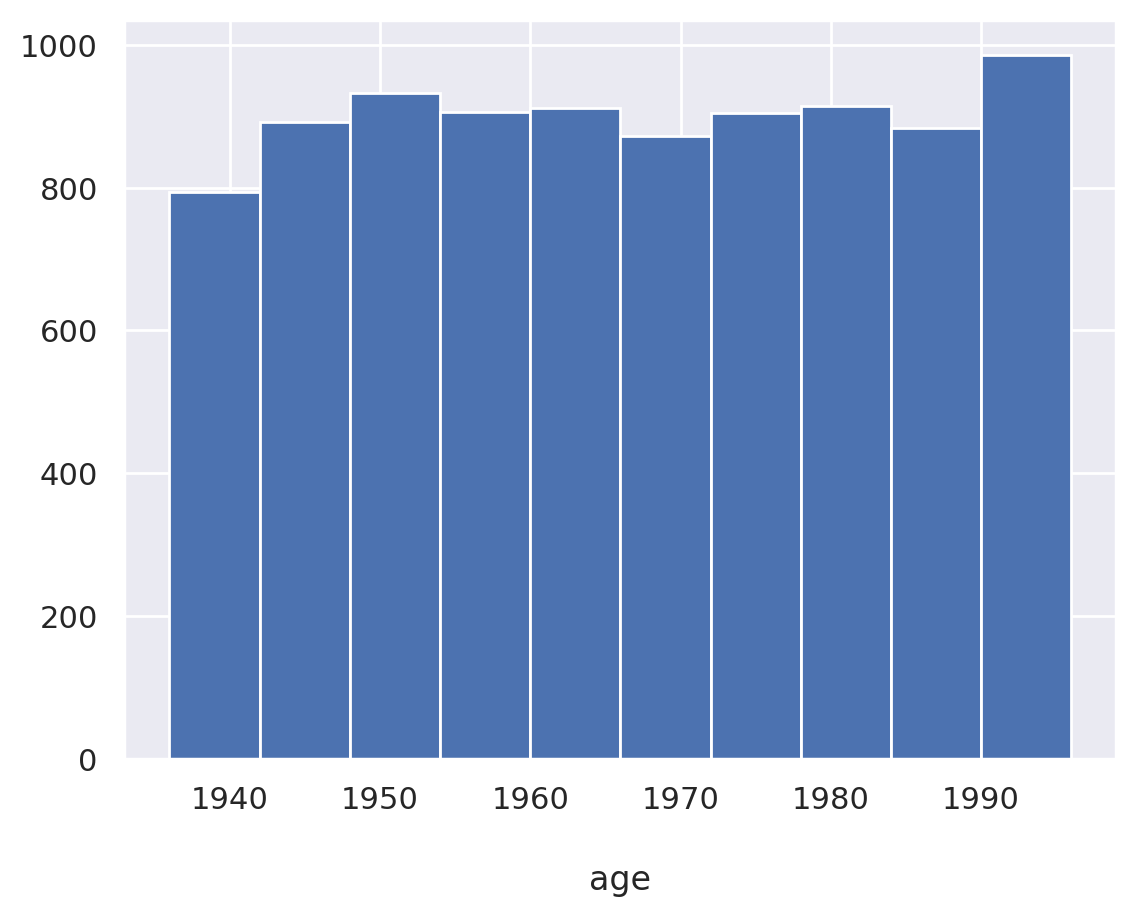

In [59]:
# Single Metric Variable Histogram
plt.hist(df["age"], bins=10)  # mess around with the bins
plt.title("age", y=-0.2)

plt.show()

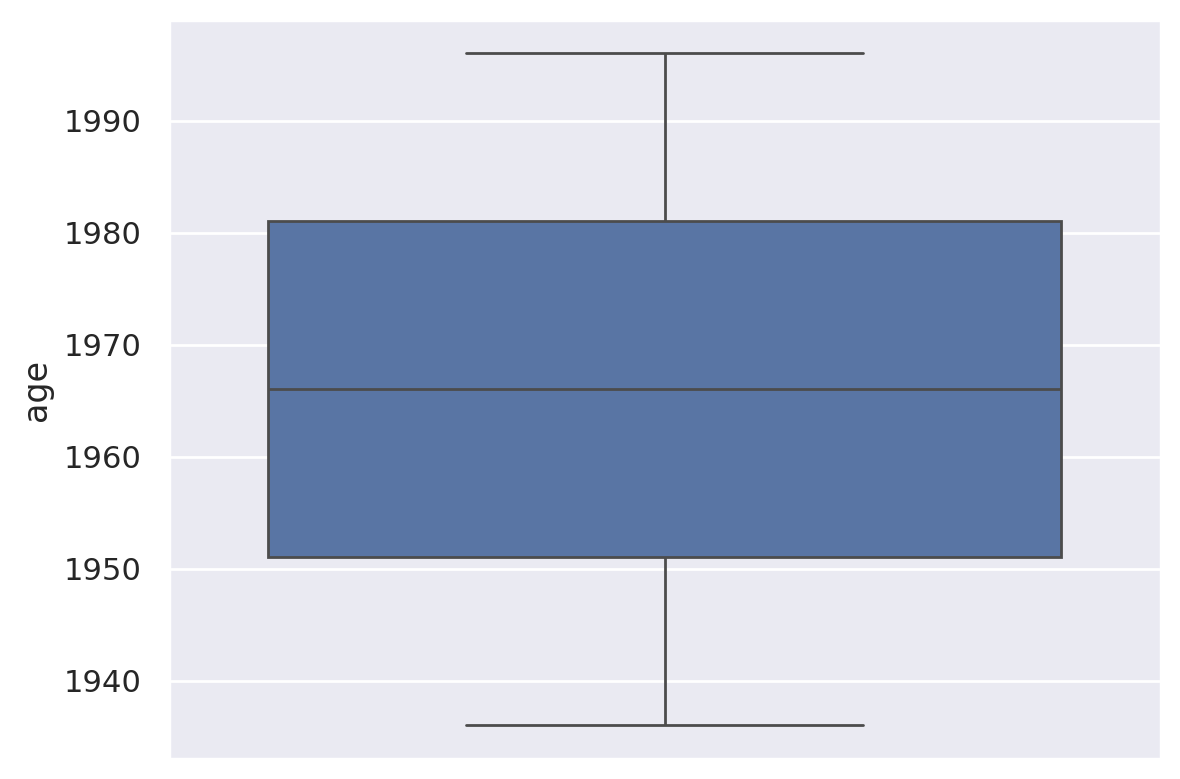

In [60]:
# Single Metric Variable Box Plot
sns.boxplot(y=df["age"])

plt.show()

What information can we extract from the plots above?

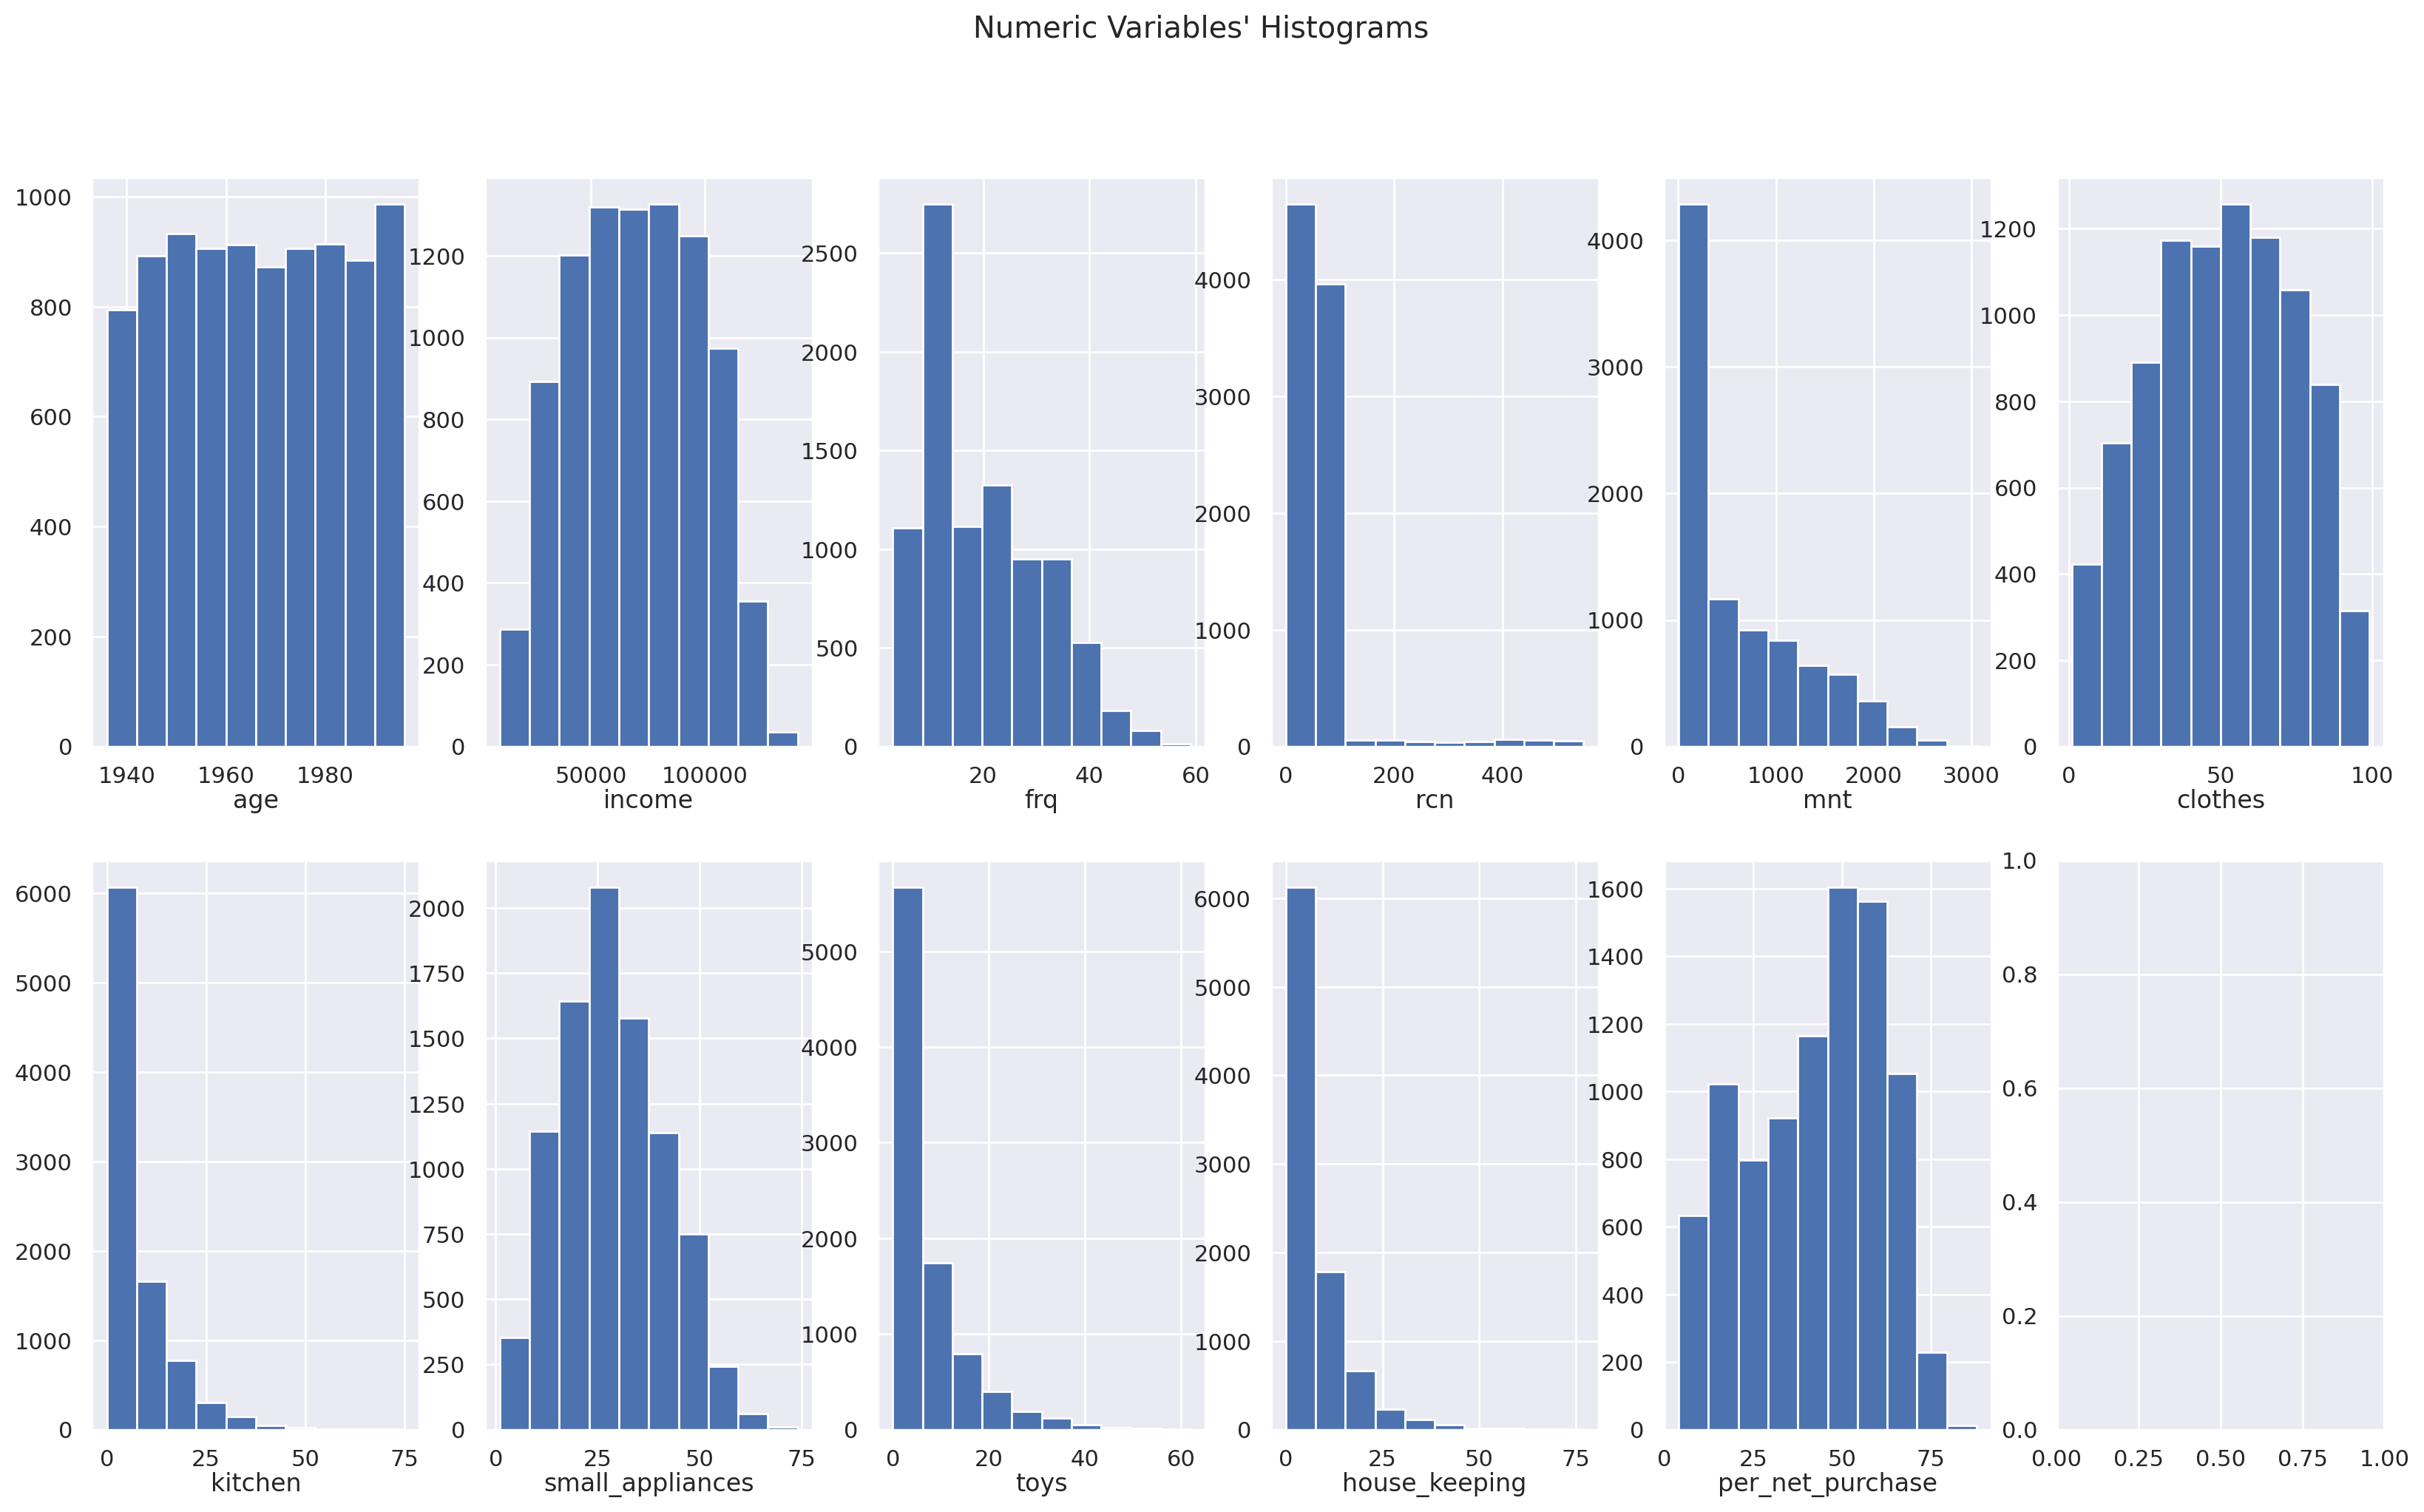

In [61]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

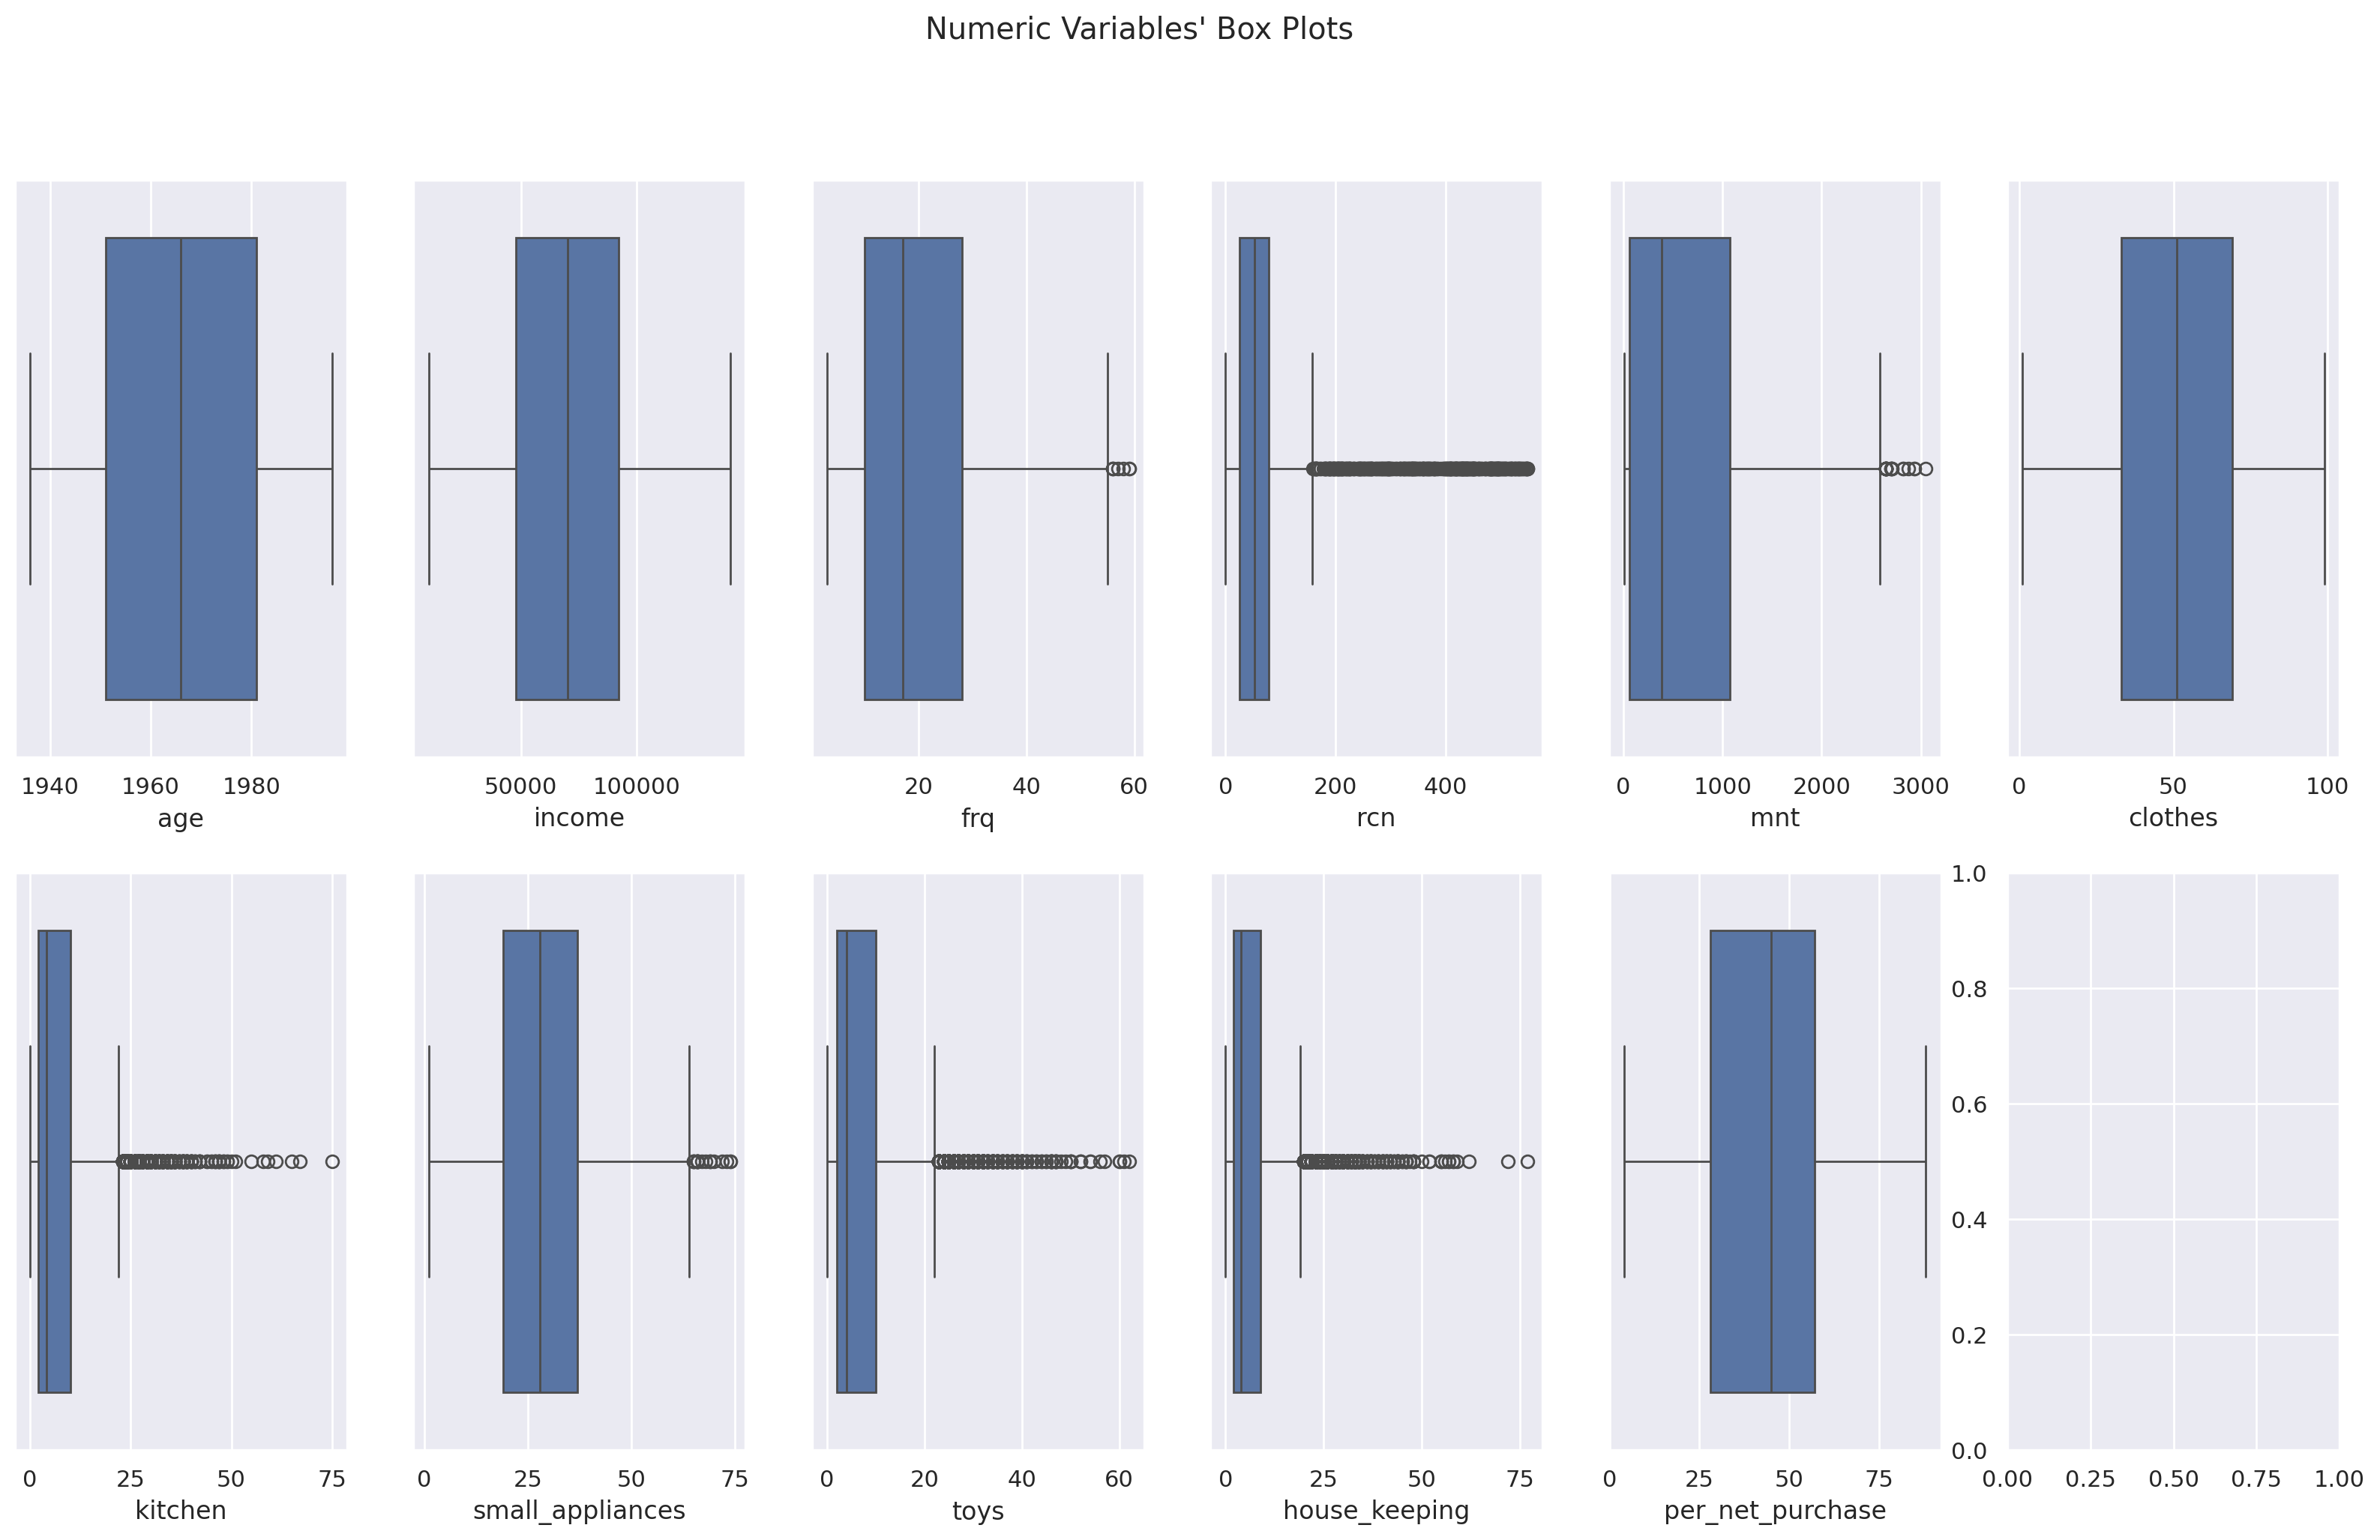

In [62]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

### Insights:
- univariate distributions
- potential univariate outliers

--------------------------------------

### During our Exploratory Data Analysis (EDA), we must also account for:
- Coherence check
- Outliers
- Missing values
- Feature Engineering

### Depending on the context, various steps must be considered when performing Data Preprocessing. 

The most relevant steps are the following:
- Coherence check (find inconsistent values, missing values, outliers and any other problem you may find in your dataset)
- Data editing (fix inconsistent values)
- Data cleansing (drop observations - Outlier removal and removal of inconsistent values and/or features)
- Data wrangling (feature extraction/engineering and transformation)
- Data reduction (reducing the dimensionality of a dataset, producing summary statistics, reducing the number of records in a dataset)